In [1]:
import pandas as pd

df = pd.read_csv('usa-2016-presidential-election-by-county.csv',sep=';')
df

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
0,Alaska,AK,2100,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nebraska,NE,31145,"Red Willow County, Nebraska",13.0,5061.0,1216.0,952.0,3735.0,3891.0,...,5044.0,4936.0,93.0,93.0,0.018841,0.018438,0.803428,0.754393,0.196572,0.245607
2,California,CA,6015,"Del Norte County, California",18.0,9361.0,4323.0,3791.0,4967.0,4614.0,...,9531.0,8770.0,241.0,365.0,0.041619,0.025286,0.548959,0.534661,0.451041,0.465339
3,Florida,FL,12031,"Duval County, Florida",199.0,428734.0,202618.0,196737.0,210537.0,211615.0,...,415761.0,411848.0,2606.0,3496.0,0.008489,0.006268,0.518217,0.509584,0.481783,0.490416
4,Kansas,KS,20053,"Ellsworth County, Kansas",25.0,2626.0,851.0,702.0,2021.0,1930.0,...,2938.0,2712.0,66.0,80.0,0.029499,0.022464,0.733283,0.703691,0.266717,0.296309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,Tennessee,TN,47131,"Obion County, Tennessee",12.0,12223.0,4308.0,3321.0,8873.0,8814.0,...,13392.0,12297.0,211.0,162.0,0.013174,0.015756,0.726329,0.673166,0.273671,0.326834
3139,Michigan,MI,26099,"Macomb County, Michigan",337.0,418773.0,223784.0,208016.0,187663.0,191913.0,...,419216.0,404086.0,7769.0,4157.0,0.010287,0.018532,0.479868,0.456105,0.520132,0.543895
3140,West Virginia,WV,54007,"Braxton County, West Virginia",18.0,5063.0,2704.0,1998.0,2629.0,2725.0,...,5409.0,4804.0,76.0,81.0,0.016861,0.014051,0.576964,0.492968,0.423036,0.507032
3141,North Carolina,NC,37121,"Mitchell County, North Carolina",9.0,7948.0,2238.0,1838.0,5499.0,5806.0,...,7846.0,7765.0,109.0,121.0,0.015583,0.013892,0.759550,0.710741,0.240450,0.289259


### Basic data analysis

We first observe that we have many features (159). Since we are predicting results for 2016 US elections, we remove other data like votes for other candidates or votes during other elections. We create our class label, which is the outcome of each county and remove all unique identifiers like State, County, etc. We also remove features with many NaN valaues. We also manually narrow down our features to those that cover key topics (i.e 

In [2]:
import numpy as np
df['CountyOutcome'] = np.where(df['Votes16 Clintonh']>=df['Votes16 Trumpd'], 'Clinton', 'Trump')
df

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2,CountyOutcome
0,Alaska,AK,2100,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump
1,Nebraska,NE,31145,"Red Willow County, Nebraska",13.0,5061.0,1216.0,952.0,3735.0,3891.0,...,4936.0,93.0,93.0,0.018841,0.018438,0.803428,0.754393,0.196572,0.245607,Trump
2,California,CA,6015,"Del Norte County, California",18.0,9361.0,4323.0,3791.0,4967.0,4614.0,...,8770.0,241.0,365.0,0.041619,0.025286,0.548959,0.534661,0.451041,0.465339,Trump
3,Florida,FL,12031,"Duval County, Florida",199.0,428734.0,202618.0,196737.0,210537.0,211615.0,...,411848.0,2606.0,3496.0,0.008489,0.006268,0.518217,0.509584,0.481783,0.490416,Trump
4,Kansas,KS,20053,"Ellsworth County, Kansas",25.0,2626.0,851.0,702.0,2021.0,1930.0,...,2712.0,66.0,80.0,0.029499,0.022464,0.733283,0.703691,0.266717,0.296309,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,Tennessee,TN,47131,"Obion County, Tennessee",12.0,12223.0,4308.0,3321.0,8873.0,8814.0,...,12297.0,211.0,162.0,0.013174,0.015756,0.726329,0.673166,0.273671,0.326834,Trump
3139,Michigan,MI,26099,"Macomb County, Michigan",337.0,418773.0,223784.0,208016.0,187663.0,191913.0,...,404086.0,7769.0,4157.0,0.010287,0.018532,0.479868,0.456105,0.520132,0.543895,Trump
3140,West Virginia,WV,54007,"Braxton County, West Virginia",18.0,5063.0,2704.0,1998.0,2629.0,2725.0,...,4804.0,76.0,81.0,0.016861,0.014051,0.576964,0.492968,0.423036,0.507032,Trump
3141,North Carolina,NC,37121,"Mitchell County, North Carolina",9.0,7948.0,2238.0,1838.0,5499.0,5806.0,...,7765.0,109.0,121.0,0.015583,0.013892,0.759550,0.710741,0.240450,0.289259,Trump


In [3]:
#we ignore other data such as votes to other candidates or votes during other elections
df = df[["CountyOutcome","Less Than High School Diploma","At Least High School Diploma","At Least Bachelors's Degree","Graduate Degree",
         "School Enrollment","Median Earnings 2010","White (Not Latino) Population","African American Population",
         "Native American Population","Asian American Population","Other Race or Races","Latino Population",
         "Children Under 6 Living in Poverty","Adults 65 and Older Living in Poverty","Total Population",
         "Preschool.Enrollment.Ratio.enrolled.ages.3.and.4","Poverty.Rate.below.federal.poverty.threshold",
         "Gini.Coefficient","Child.Poverty.living.in.families.below.the.poverty.line",
         "Management.professional.and.related.occupations","Service.occupations","Sales.and.office.occupations",
         "Farming.fishing.and.forestry.occupations","Construction.extraction.maintenance.and.repair.occupations",
         "Production.transportation.and.material.moving.occupations","Median Age","Poor.physical.health.days",
         "Poor.mental.health.days","Low.birthweight","Teen.births","Children.in.single.parent.households","Adult.smoking",
         "Adult.obesity","Diabetes","Sexually.transmitted.infections","HIV.prevalence.rate","Uninsured","Unemployment",
         "Violent.crime","Homicide.rate","Injury.deaths","Infant.mortality"]]
df

,CountyOutcome,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Trump,6.0,94.0,33.1,11.7,85.90,21968.402540,82.95,0.40,7.70,...,0.296,0.083,195.8,NaN,0.282,0.081,541.11,NaN,NaN,NaN
1,Trump,8.3,91.7,21.6,6.2,72.90,20965.324125,94.15,0.45,0.25,...,0.302,0.097,99.7,NaN,0.129,0.033,73.04,NaN,74.1,NaN
2,Trump,18.7,81.3,14.3,4.3,73.20,23797.859685,66.05,3.40,5.60,...,0.255,0.088,202.4,139.6,0.173,0.134,436.93,8.56,95.6,NaN
3,Trump,12.8,87.2,24.9,8.0,73.85,30197.958730,58.00,28.85,0.30,...,0.284,0.108,682.1,708.6,0.193,0.088,719.14,13.97,76.4,10.1
4,Trump,9.4,90.6,19.8,6.1,72.15,24146.331745,88.90,3.90,0.35,...,0.340,0.102,77.1,87.5,0.138,0.033,218.79,NaN,64.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,Trump,20.1,79.9,11.9,3.5,75.50,24617.460635,85.20,9.95,0.25,...,0.321,0.132,443.5,107.1,0.159,0.133,319.16,NaN,80.9,11.0
3139,Trump,12.4,87.6,21.8,7.6,80.25,31933.342855,85.20,7.60,0.30,...,0.300,0.108,231.6,82.7,0.139,0.104,315.70,3.70,58.0,5.9
3140,Trump,26.1,73.9,9.5,3.1,66.95,22847.853015,97.55,0.60,0.35,...,0.340,0.144,82.8,95.9,0.207,0.095,210.11,NaN,83.8,NaN
3141,Trump,23.5,76.5,14.4,4.9,73.65,23144.238730,94.40,0.40,0.10,...,0.291,0.116,103.6,118.9,0.196,0.118,NaN,NaN,96.9,NaN


In [4]:
df.isna().sum()

CountyOutcome                                                    0
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors's Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Latino) Population                                    0
African American Population                                      0
Native American Population                                       0
Asian American Population                                        0
Other Race or Races                                              0
Latino Population                                                0
Children Under 6 Living in Poverty                               0
Adults 65 and Older Living in Poverty                         

In [5]:
#We drop features with many missing values along with other non independent features
data = df.drop(columns=['Poor.physical.health.days','Poor.mental.health.days','Low.birthweight', 'Teen.births', 'Adult.smoking', 'Sexually.transmitted.infections', 'HIV.prevalence.rate','Homicide.rate','Injury.deaths','Infant.mortality'])
data.isna().sum()


CountyOutcome                                                   0
Less Than High School Diploma                                   0
At Least High School Diploma                                    0
At Least Bachelors's Degree                                     0
Graduate Degree                                                 0
School Enrollment                                               0
Median Earnings 2010                                            0
White (Not Latino) Population                                   0
African American Population                                     0
Native American Population                                      0
Asian American Population                                       0
Other Race or Races                                             0
Latino Population                                               0
Children Under 6 Living in Poverty                              0
Adults 65 and Older Living in Poverty                           0
Total Popu

In [6]:
data = data.dropna()
data

,CountyOutcome,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,...,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Median Age,Children.in.single.parent.households,Adult.obesity,Diabetes,Uninsured,Unemployment,Violent.crime
0,Trump,6.0,94.0,33.1,11.7,85.90,21968.402540,82.95,0.40,7.70,...,2.20,12.30,9.10,49.6,0.196,0.296,0.083,0.282,0.081,541.11
1,Trump,8.3,91.7,21.6,6.2,72.90,20965.324125,94.15,0.45,0.25,...,2.00,9.50,16.60,42.9,0.166,0.302,0.097,0.129,0.033,73.04
2,Trump,18.7,81.3,14.3,4.3,73.20,23797.859685,66.05,3.40,5.60,...,3.50,7.05,7.05,37.9,0.416,0.255,0.088,0.173,0.134,436.93
3,Trump,12.8,87.2,24.9,8.0,73.85,30197.958730,58.00,28.85,0.30,...,0.10,9.80,10.45,35.4,0.408,0.284,0.108,0.193,0.088,719.14
4,Trump,9.4,90.6,19.8,6.1,72.15,24146.331745,88.90,3.90,0.35,...,1.80,12.30,13.95,42.9,0.253,0.340,0.102,0.138,0.033,218.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Clinton,13.2,86.8,27.3,15.1,87.30,10229.878413,91.60,2.70,0.15,...,0.45,7.00,10.45,25.9,0.319,0.331,0.097,0.171,0.077,101.67
3138,Trump,20.1,79.9,11.9,3.5,75.50,24617.460635,85.20,9.95,0.25,...,0.60,9.60,27.45,40.5,0.361,0.321,0.132,0.159,0.133,319.16
3139,Trump,12.4,87.6,21.8,7.6,80.25,31933.342855,85.20,7.60,0.30,...,0.10,8.30,14.85,39.3,0.276,0.300,0.108,0.139,0.104,315.70
3140,Trump,26.1,73.9,9.5,3.1,66.95,22847.853015,97.55,0.60,0.35,...,1.85,21.15,15.40,42.6,0.206,0.340,0.144,0.207,0.095,210.11


We end up with 32 features and 1 target variable as our columns

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [8]:
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['CountyOutcome', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupat

In [9]:
# y includes our labels and x includes our features
y = data.CountyOutcome                           
x = data.drop('CountyOutcome',axis = 1 )
x.head()

,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,...,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Median Age,Children.in.single.parent.households,Adult.obesity,Diabetes,Uninsured,Unemployment,Violent.crime
0,6.0,94.0,33.1,11.7,85.90,21968.402540,82.95,0.40,7.70,0.25,...,2.2,12.30,9.10,49.6,0.196,0.296,0.083,0.282,0.081,541.11
1,8.3,91.7,21.6,6.2,72.90,20965.324125,94.15,0.45,0.25,0.40,...,2.0,9.50,16.60,42.9,0.166,0.302,0.097,0.129,0.033,73.04
2,18.7,81.3,14.3,4.3,73.20,23797.859685,66.05,3.40,5.60,3.10,...,3.5,7.05,7.05,37.9,0.416,0.255,0.088,0.173,0.134,436.93
3,12.8,87.2,24.9,8.0,73.85,30197.958730,58.00,28.85,0.30,3.80,...,0.1,9.80,10.45,35.4,0.408,0.284,0.108,0.193,0.088,719.14
4,9.4,90.6,19.8,6.1,72.15,24146.331745,88.90,3.90,0.35,0.45,...,1.8,12.30,13.95,42.9,0.253,0.340,0.102,0.138,0.033,218.79


### Visualizations

Number of Trump:  2482
Number of Clinton :  466


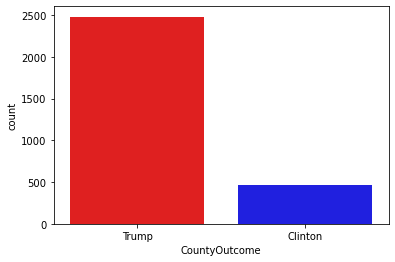

In [10]:
my_pal = {"Trump": "r", "Clinton": "b"}
ax = sns.countplot(y,label="Count",palette=my_pal)      
Trump, Clinton = y.value_counts()
print('Number of Trump: ',Trump) 
print('Number of Clinton : ',Clinton)

This is expected as there are many more rural/conservative counties as opposed to fewer big densly populated democratic city areas

In [11]:
x.describe()

,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,...,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Median Age,Children.in.single.parent.households,Adult.obesity,Diabetes,Uninsured,Unemployment,Violent.crime
count,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,...,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000
mean,16.791537,83.191503,19.254003,6.566486,75.037992,25565.836873,78.992147,8.686262,1.536448,1.127578,...,2.003104,11.491774,16.159396,39.824152,0.315767,0.304735,0.106836,0.178513,0.076876,257.386126
std,7.233902,7.268881,8.750525,3.897575,4.990805,5076.268152,19.145684,14.080867,6.077263,2.356466,...,2.407348,3.333321,5.953901,4.812527,0.100267,0.042135,0.022209,0.054642,0.027043,207.391223
min,0.700000,43.250000,4.700000,0.600000,38.000000,0.000000,2.500000,0.000000,0.000000,0.000000,...,0.000000,1.950000,1.450000,21.700000,0.000000,0.131000,0.033000,0.031000,0.008000,0.000000
25%,11.400000,78.675000,13.200000,4.100000,72.350000,22426.566034,68.150000,0.450000,0.200000,0.250000,...,0.500000,9.250000,11.687500,37.075000,0.250000,0.283000,0.092000,0.138000,0.058750,115.745000
50%,15.300000,84.700000,17.100000,5.500000,75.250000,24937.202223,86.250000,2.100000,0.300000,0.500000,...,1.200000,11.050000,15.725000,39.900000,0.308000,0.306000,0.106000,0.176000,0.075000,202.210000
75%,21.300000,88.600000,23.000000,7.800000,77.950000,27644.403890,94.150000,9.950000,0.650000,1.050000,...,2.600000,13.250000,20.062500,42.700000,0.368250,0.331000,0.122000,0.213000,0.093000,340.902500
max,52.100000,99.300000,71.000000,40.600000,93.350000,56674.350795,99.200000,86.100000,90.750000,42.700000,...,27.500000,28.750000,59.400000,61.400000,0.787000,0.479000,0.194000,0.389000,0.283000,1989.540000


Before violin and box plot we need to normalization because differences between values of some features are very high to observe on plot. We plot features in 3 group and each group includes 10 features to observe more clearly.

Violin plots are similar to box plots, except that they also show the probability density of the data at different values

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

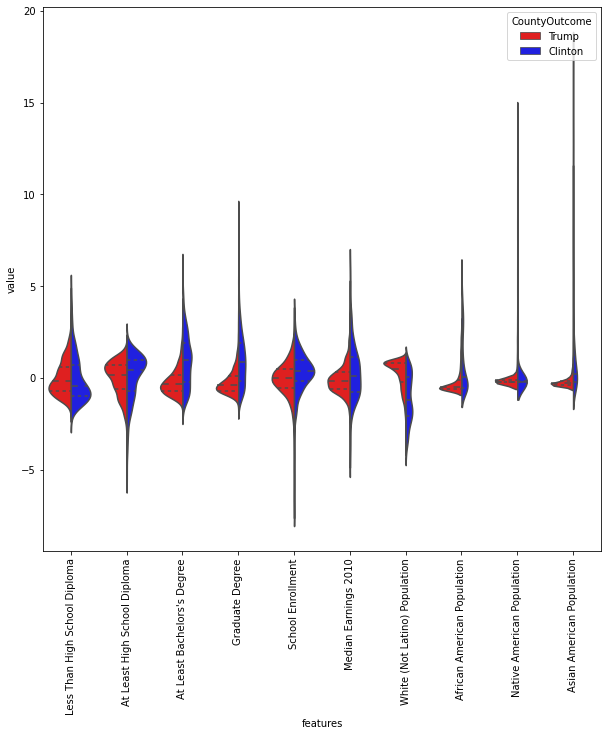

In [12]:
#first 10 features plot
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="CountyOutcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="CountyOutcome",palette=my_pal, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

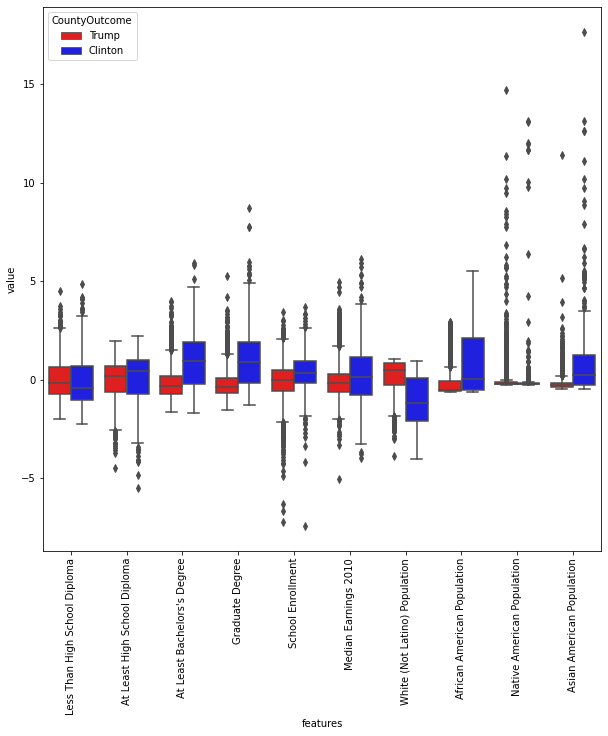

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="CountyOutcome",palette=my_pal, data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

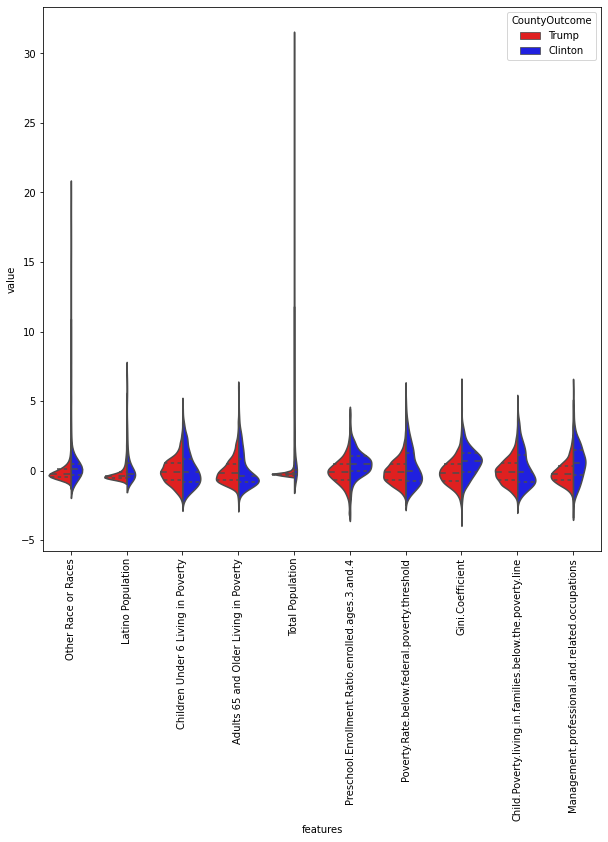

In [14]:
#Second ten features plot
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="CountyOutcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="CountyOutcome",palette=my_pal, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

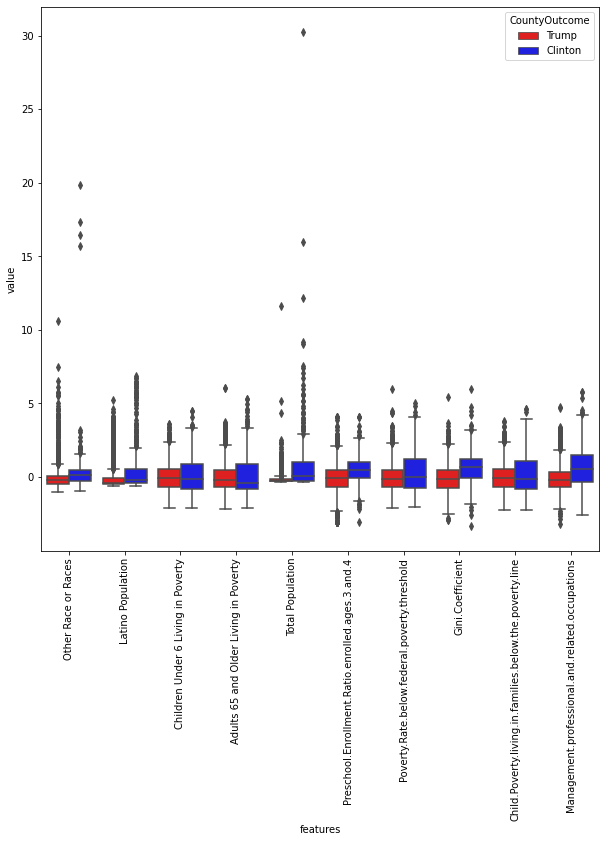

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="CountyOutcome",palette=my_pal, data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

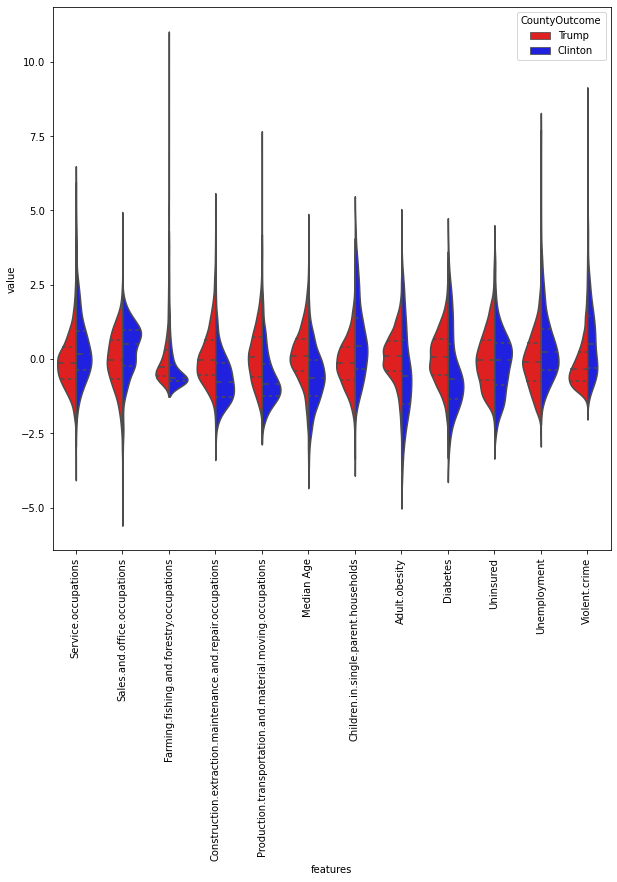

In [16]:
#last 9 features plot
data = pd.concat([y,data_n_2.iloc[:,20:32]],axis=1)
data = pd.melt(data,id_vars="CountyOutcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="CountyOutcome",palette=my_pal, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

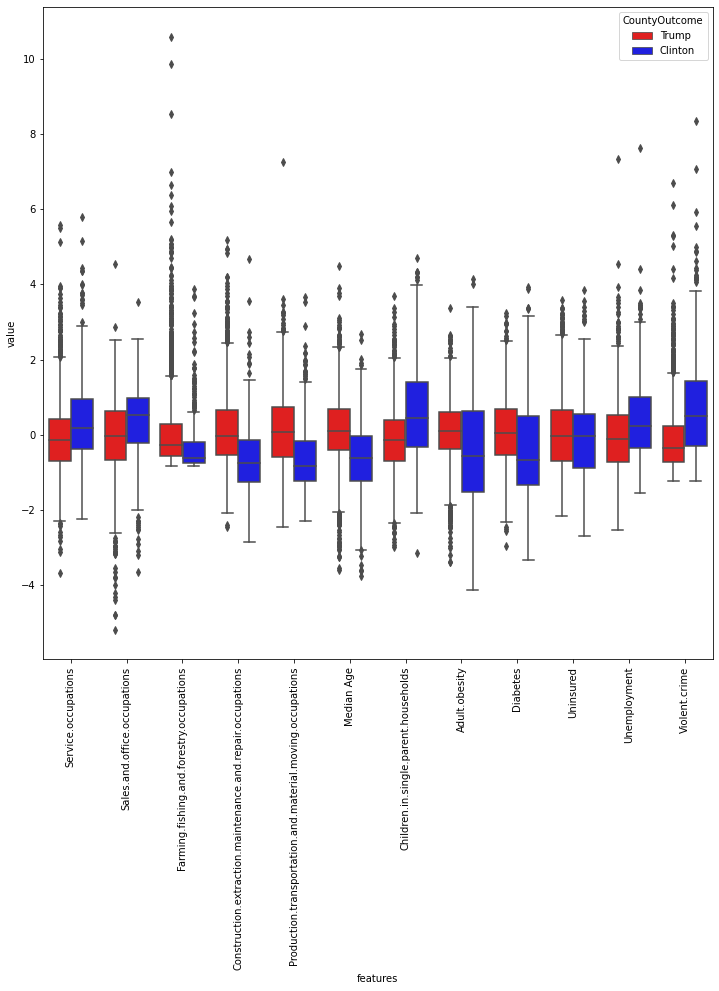

In [17]:
plt.figure(figsize=(12,12))
sns.boxplot(x="features", y="value", hue="CountyOutcome",palette=my_pal, data=data)
plt.xticks(rotation=90)

From the box/violin plot we make some initial oberservations, e.g. in some of the features such as 'At Least Bachelors's Degree' or 'White (Not Latino) Population', the median for a Trump and Clinton CountyOutcome look to be very seperated, leading us to believe this might be a good feature for classification.

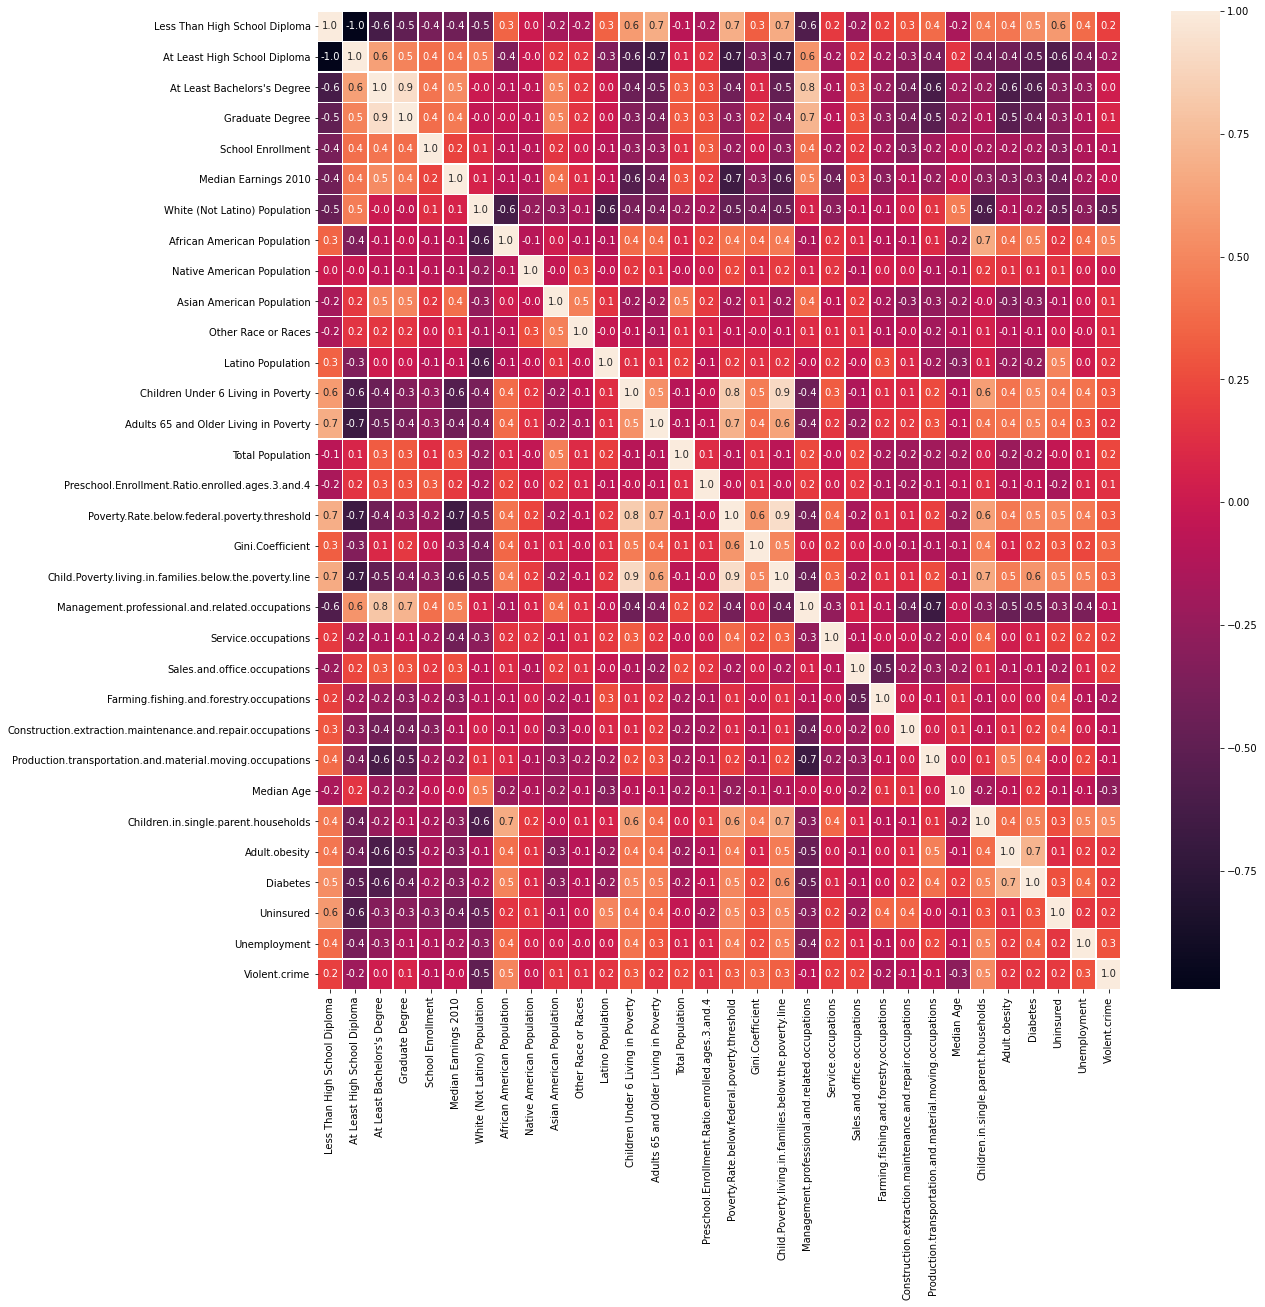

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Feature Selection and Random Forest Classification

Using a threshold of 80% we observe that the following pairs of features are correlated and remove one from each pair:
- Management.professional.and.related.occupations AND At Least a bachelor's Degree 
- Graduate Degree AND At Least a bachelor's Degree
- Children Under 6 Living in Poverty AND Poverty.Rate.below.federal.poverty.threshold
- Child.Poverty.living.in.families.below.the.poverty.line AND Children Under 6 Living in Poverty
- Child.Poverty.living.in.families.below.the.poverty.line AND Poverty.Rate.below.federal.poverty.threshold

In [19]:
x_1 = x.drop(['Management.professional.and.related.occupations', 'Graduate Degree', 'Children Under 6 Living in Poverty', 'Child.Poverty.living.in.families.below.the.poverty.line'],axis = 1 )        
x_1.head()

,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,...,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Median Age,Children.in.single.parent.households,Adult.obesity,Diabetes,Uninsured,Unemployment,Violent.crime
0,6.0,94.0,33.1,85.90,21968.402540,82.95,0.40,7.70,0.25,6.20,...,2.2,12.30,9.10,49.6,0.196,0.296,0.083,0.282,0.081,541.11
1,8.3,91.7,21.6,72.90,20965.324125,94.15,0.45,0.25,0.40,0.90,...,2.0,9.50,16.60,42.9,0.166,0.302,0.097,0.129,0.033,73.04
2,18.7,81.3,14.3,73.20,23797.859685,66.05,3.40,5.60,3.10,4.95,...,3.5,7.05,7.05,37.9,0.416,0.255,0.088,0.173,0.134,436.93
3,12.8,87.2,24.9,73.85,30197.958730,58.00,28.85,0.30,3.80,2.25,...,0.1,9.80,10.45,35.4,0.408,0.284,0.108,0.193,0.088,719.14
4,9.4,90.6,19.8,72.15,24146.331745,88.90,3.90,0.35,0.45,1.60,...,1.8,12.30,13.95,42.9,0.253,0.340,0.102,0.138,0.033,218.79


Accuracy is:  0.9480225988700565


Text(0.5, 15.0, 'Predicted')

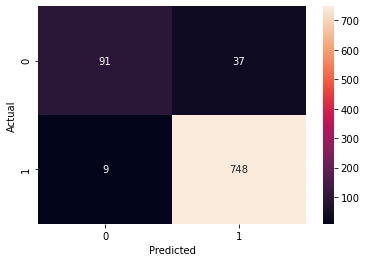

In [20]:
#Use random forest to find accuracy according to these features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

# Results - ROC Curve
y_test_pred_probs = clf_rf.predict(x_test)
ac = accuracy_score(y_test, y_test_pred_probs)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_test_pred_probs)
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')

#Accuracy is almost 95% from our confusion matrix

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_probs, labels=['Trump', 'Clinton']))

print("roc_auc score: " + str(roc_auc_score(y_test,clf_rf.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs, average=None)))

              precision    recall  f1-score   support

       Trump       0.95      0.99      0.97       757
     Clinton       0.91      0.71      0.80       128

    accuracy                           0.95       885
   macro avg       0.93      0.85      0.88       885
weighted avg       0.95      0.95      0.95       885

roc_auc score: 0.9681307793923382
f1 score: [0.79824561 0.97016861]


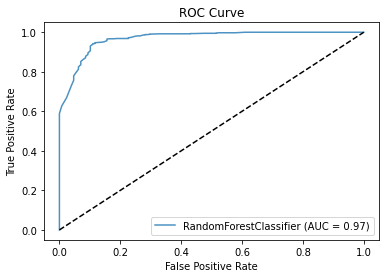

In [22]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clr_rf, x_test, y_test, ax=ax, alpha=0.8)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.show()

#### Univariate feature selection and random forest classification

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
# we find best scored 5 features and train
select_feature = SelectKBest(f_classif, k=5).fit(x_train, y_train)

In [24]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [  1.38630172   0.68042466 463.97901102  42.03788603  42.03938578
 641.13429729 299.34256024   0.73401123 400.17742012  33.1222207
 110.06002119   5.96098671 242.96615379 112.74086902  38.01668747
 197.18592873  66.67109665  37.52997957  29.83031181 178.95222234
 168.86451248 176.78888811 191.31057671  89.03842428  53.29683179
   4.28374825  58.67357387 228.67894002]
Feature list: Index(['Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'School Enrollment',
       'Median Earnings 2010', 'White (Not Latino) Population',
       'African American Population', 'Native American Population',
       'Asian American Population', 'Other Race or Races', 'Latino Population',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Service.occupations', 'Sales.and.office.occupations

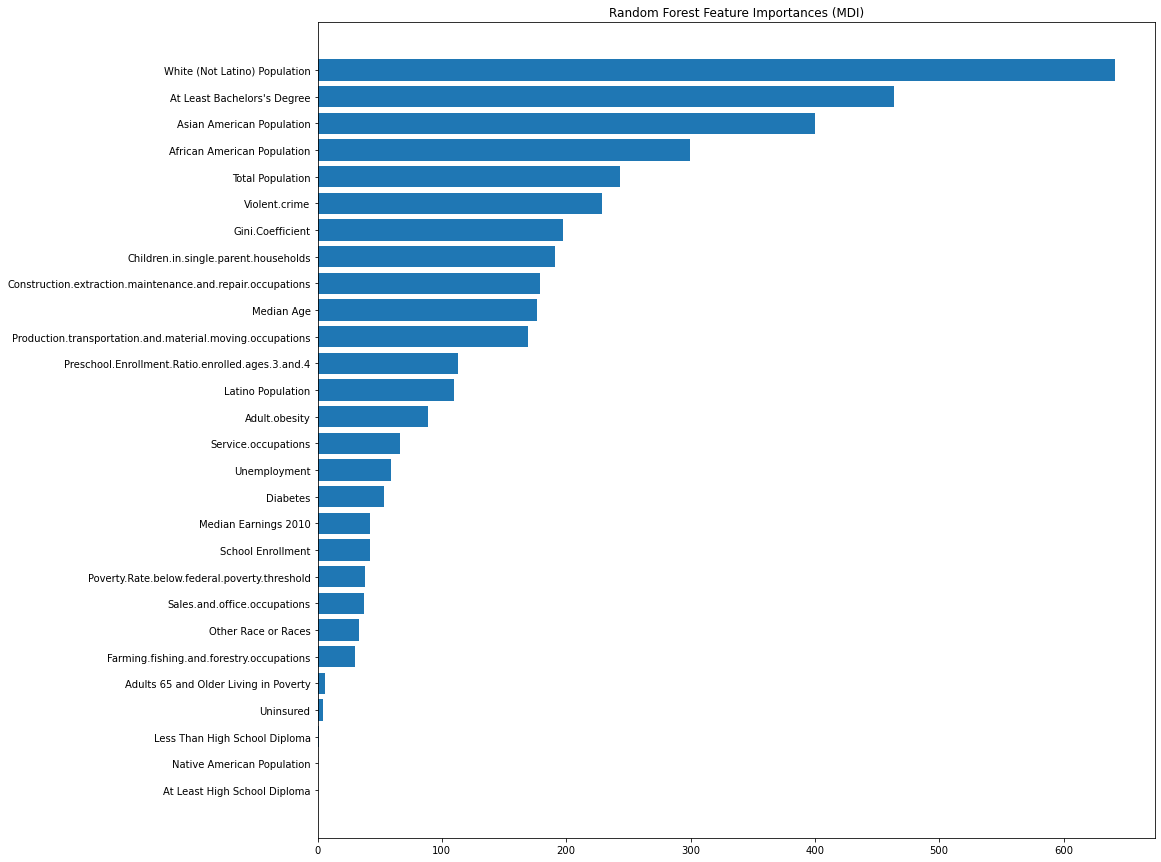

In [25]:
sorted_idx = np.argsort(select_feature.scores_)
y_ticks = np.arange(0, len(x_train.columns))
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.barh(y_ticks, select_feature.scores_[sorted_idx])
ax.set_yticklabels(x_train.columns[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
plt.show()

In [26]:
print(x_train.columns[sorted_idx])

Index(['At Least High School Diploma', 'Native American Population',
       'Less Than High School Diploma', 'Uninsured',
       'Adults 65 and Older Living in Poverty',
       'Farming.fishing.and.forestry.occupations', 'Other Race or Races',
       'Sales.and.office.occupations',
       'Poverty.Rate.below.federal.poverty.threshold', 'School Enrollment',
       'Median Earnings 2010', 'Diabetes', 'Unemployment',
       'Service.occupations', 'Adult.obesity', 'Latino Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Production.transportation.and.material.moving.occupations',
       'Median Age',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Children.in.single.parent.households', 'Gini.Coefficient',
       'Violent.crime', 'Total Population', 'African American Population',
       'Asian American Population', 'At Least Bachelors's Degree',
       'White (Not Latino) Population'],
      dtype='object')


We test accuracy with the top 5 features with the highest score

Accuracy is:  0.9288135593220339
roc_auc score: 0.9425518081241744
f1 score: [0.74074074 0.95874263]


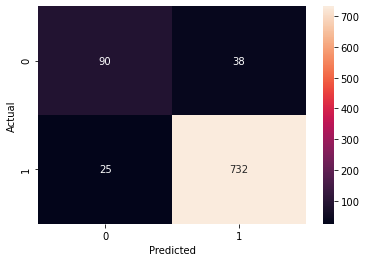

In [27]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
print("roc_auc score: " + str(roc_auc_score(y_test,clf_rf_2.predict_proba(x_test_2)[:,1])))
print("f1 score: " + str(f1_score(y_test, clf_rf_2.predict(x_test_2), average=None)))

We observe that our accuracy from our confusion matrix decreased to 92%

## 10 Best Features

Accuracy is:  0.9480225988700565


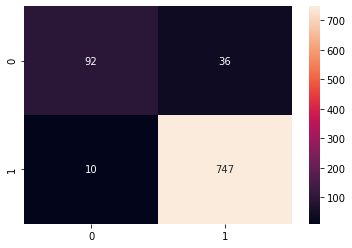

In [28]:
select_feature = SelectKBest(f_classif, k=10).fit(x_train, y_train)

x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### Recursive feature elimination with cross validation and random forest classification

From above we know 5 features is insufficient, so we run a recurive feature elimination to find a more appropriate number of features

In [29]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   
#5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 26
Best features : Index(['Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'School Enrollment',
       'White (Not Latino) Population', 'African American Population',
       'Asian American Population', 'Other Race or Races', 'Latino Population',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'Median Age', 'Children.in.single.parent.households', 'Adult.obesity',
       'Diabetes', 'Uninsured', 'Unemployment', 'Violent.crime'],
      dtype='object')


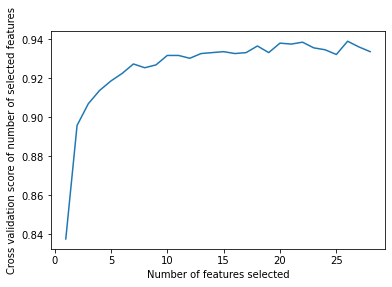

In [30]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

We observe that around 10 features is sufficient for without significant loss in accuracy

#### Recursive feature elimination (RFE) with random forest

In [31]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)

In [32]:
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['At Least Bachelors's Degree', 'White (Not Latino) Population',
       'African American Population', 'Asian American Population',
       'Latino Population', 'Total Population',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Children.in.single.parent.households', 'Adult.obesity', 'Diabetes'],
      dtype='object')


## Randomized Search Cross Validation

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint

In [54]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [31]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

Accuracy is:  0.9468926553672317


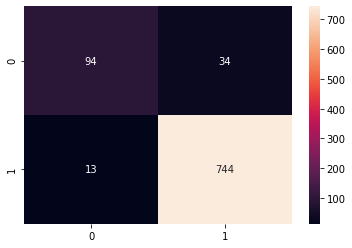

In [60]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)

ac = accuracy_score(y_test,base_model.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,base_model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

## Grid Search with cross validation

In [65]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [66]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_
{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.6min finished


Accuracy is:  0.9480225988700565


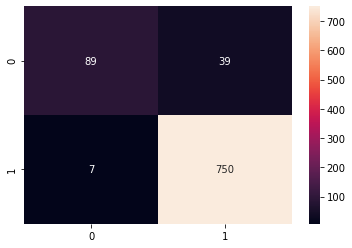

In [67]:
ac = accuracy_score(y_test,best_grid.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,best_grid.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

## SMOTE

In [30]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

Class=Trump, n=1725 (58.514%)
Class=Clinton, n=1725 (58.514%)


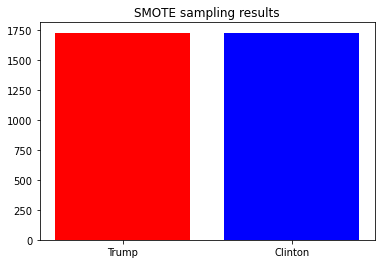

In [98]:
#oversample = RandomOverSampler(sampling_strategy='minority')
#oversample = RandomOverSampler(sampling_strategy=0.5)
oversample = SMOTE(random_state=42)
X_train, Y_train = oversample.fit_resample(x_train, y_train)
counter = Counter(Y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(), color=['red', 'blue'])
plt.title("SMOTE sampling results")
plt.show()

Accuracy is:  0.9310734463276836


Text(0.5, 15.0, 'Predicted')

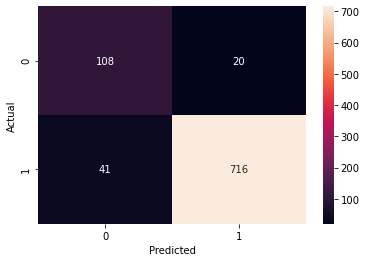

In [94]:
#random forest classifier with n_estimators=10 (default)
clf_rf_OS = RandomForestClassifier(random_state=43)      
clr_rf_OS = clf_rf.fit(X_train,Y_train)

# Results - ROC Curve
y_test_pred_probs_OS = clr_rf_OS.predict(x_test)
ac = accuracy_score(y_test, y_test_pred_probs_OS)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_test_pred_probs_OS)
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [93]:
print("roc_auc score: " + str(roc_auc_score(y_test,clr_rf_OS.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs_OS, average=None)))

roc_auc score: 0.9599106258256275
f1 score: [0.77978339 0.95914267]


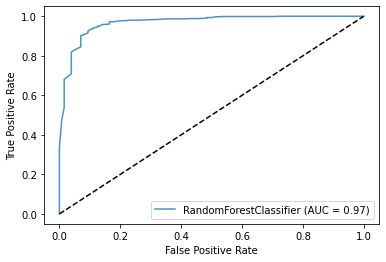

In [61]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clr_rf_OS, x_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.plot([0,1],[0,1],'--', color='black')
plt.show()